<a href="https://colab.research.google.com/github/anvicoder/Data-Science-Assignment-eCommerce-Transactions-/blob/main/Anviksha_Patel_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import gdown
customer_id = '1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE'
transaction_id = '1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'
gdown.download(f'https://drive.google.com/uc?id={customer_id}', 'customer.csv', quiet=False)
gdown.download(f'https://drive.google.com/uc?id={transaction_id}', 'transaction.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
To: /content/customer.csv
100%|██████████| 8.54k/8.54k [00:00<00:00, 7.91MB/s]
Downloading...
From: https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF
To: /content/transaction.csv
100%|██████████| 54.7k/54.7k [00:00<00:00, 53.5MB/s]


'transaction.csv'

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [11]:
customers_df = pd.read_csv('customer.csv')
transactions_df = pd.read_csv('transaction.csv')
print(customers_df.head())  # For customers data
print(transactions_df.head())  # For transactions data


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [32]:
merged_df = pd.merge(customers_df, transactions_df, on='CustomerID')

print(merged_df.head())

  CustomerID      CustomerName         Region  SignupDate TransactionID  \
0      C0001  Lawrence Carroll  South America  2022-07-10        T00015   
1      C0001  Lawrence Carroll  South America  2022-07-10        T00932   
2      C0001  Lawrence Carroll  South America  2022-07-10        T00085   
3      C0001  Lawrence Carroll  South America  2022-07-10        T00445   
4      C0001  Lawrence Carroll  South America  2022-07-10        T00436   

  ProductID      TransactionDate  Quantity  TotalValue   Price  
0      P054  2024-01-19 03:12:55         2      114.60   57.30  
1      P022  2024-09-17 09:01:18         3      412.62  137.54  
2      P096  2024-04-08 00:01:00         2      614.94  307.47  
3      P083  2024-05-07 03:11:44         2      911.44  455.72  
4      P029  2024-11-02 17:04:16         3     1300.92  433.64  


In [33]:

# Calculate recency (days since last transaction)
merged_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
merged_df['Recency'] = (merged_df['TransactionDate'].max() - merged_df['TransactionDate']).dt.days



In [34]:
rfm_df = merged_df.groupby('CustomerID').agg({
    'Recency': 'min',
    'TransactionID': 'count',  # Frequency (assuming this column exists)
    'TotalValue': 'sum'        # Monetary Value
}).reset_index()

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [1]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


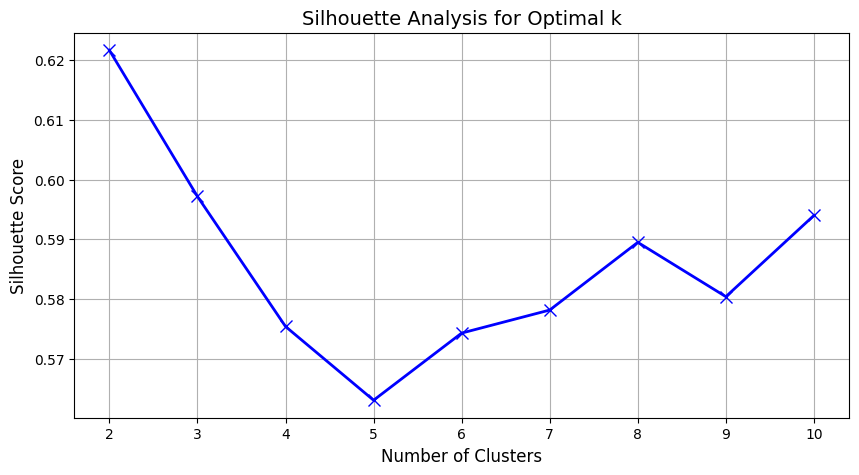

The optimal number of clusters is: 2


In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Handle missing values in X_scaled (if not already handled)
from sklearn.impute import SimpleImputer
import numpy as np

# Ensure X_scaled doesn't have NaN values
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with mean values
X_scaled = imputer.fit_transform(X_scaled)

# Determine the optimal number of clusters using the Silhouette Score
silhouette_scores = []
cluster_range = range(2, 11)  # Number of clusters from 2 to 10
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, 'bx-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Analysis for Optimal k', fontsize=14)
plt.grid(True)
plt.show()

# Print the optimal number of clusters based on the highest Silhouette Score
optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is: {optimal_k}")


In [40]:
import warnings
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
import pandas as pd

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Set the optimal number of clusters (based on prior analysis)
optimal_k = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
rfm_df['Cluster'] = cluster_labels



In [41]:
# Print the column names in rfm_df to verify
print("Columns in rfm_df:", rfm_df.columns)


Columns in rfm_df: Index(['CustomerID', 'Recency', 'TransactionID', 'TotalValue', 'Cluster'], dtype='object')


In [47]:
# Example: Update features based on the actual columns in rfm_df
features = ['CustomerID', 'Recency', 'TransactionID', 'TotalValue', 'Cluster']  # Adjust as per your dataset
# Automatically select relevant numeric columns, excluding identifiers and the 'Cluster' column
numeric_columns = rfm_df.select_dtypes(include=['float64', 'int64']).columns
features = [col for col in numeric_columns if col not in ['CustomerID', 'TransactionID', 'Cluster']]


In [48]:
# Analyze cluster characteristics
print("Cluster characteristics (mean values):")
try:
    print(rfm_df.groupby('Cluster')[features].mean())
except KeyError as e:
    print(f"Error: {e}")
    print("Ensure the 'features' list matches the columns in rfm_df.")


Cluster characteristics (mean values):
           Recency   TotalValue
Cluster                        
0        80.986301  3296.952466
1        81.295082  3492.817377
2        64.600000  3634.710308


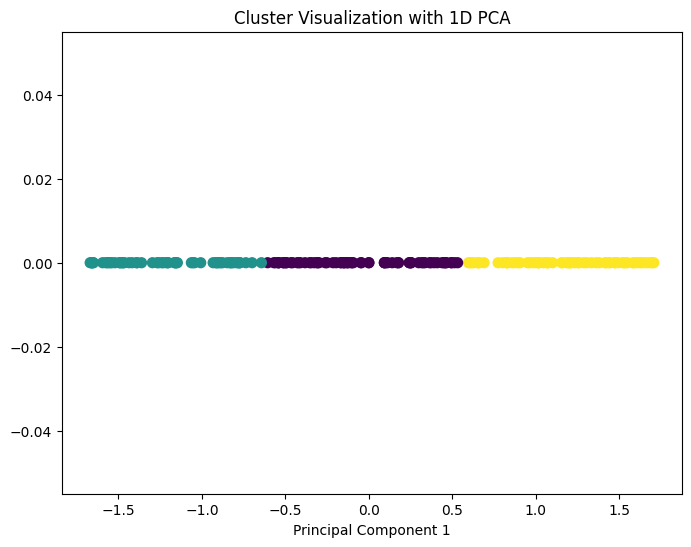

In [50]:
pca = PCA(n_components=1)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
principal_df = pd.DataFrame(data=principal_components, columns=['PC1'])

# Visualize if possible
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], [0] * len(principal_df), c=cluster_labels, cmap='viridis', s=50)
plt.title('Cluster Visualization with 1D PCA')
plt.xlabel('Principal Component 1')
plt.show()
